# AP2 - Pattern Recognition
KNN classification implementation, attributes extraction and k-fold validation to classify a sensory glove dataset.

> Name: Jonas Carvalho Fortes

> Mat: 494513



## Load Dataset

In [690]:
from scipy.io import loadmat
import pandas as pd

input_data = loadmat('data\InputData.mat')
output_data = loadmat('data\OutputData.mat')

df_input_data = pd.DataFrame(input_data['InputData'])
df_output_data = pd.DataFrame(output_data['OutputData'])

print(f'Input data shape: {df_input_data.shape}')
print(f'Output data shape: {df_output_data.shape}')


Input data shape: (1500, 120)
Output data shape: (120, 1)


In [691]:
print('Input data:')
df_input_data

Input data:


,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-2568,-1864,2692,-700,180,1516,992,3272,3740,1980,...,8360,14692,13120,17788,12544,11560,16540,10592,10256,9228
1,-2060,-1984,1464,-1364,-60,1112,980,2464,2704,2456,...,9868,15588,16428,20044,13044,10468,15416,10208,10984,9344
2,-2216,-1776,-108,-1900,-504,2456,500,1456,1756,2308,...,12068,17488,16416,20148,13504,10564,15264,10012,11632,9668
3,-2352,-1928,-1812,-2340,-548,2872,-208,1968,1736,1904,...,18920,18604,15400,19412,15472,10572,16504,10068,12308,9152
4,-1436,-3044,-2060,-1752,-560,2544,-676,1884,1656,1508,...,21100,18916,16860,18936,16072,10740,16576,10580,15328,9420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,14204,13736,13792,14168,13520,12708,12232,12696,11816,12968,...,12228,15992,14164,12220,13204,11724,14496,16068,15280,17004
1496,14460,13784,13904,14204,13620,12360,12508,12900,11900,12872,...,12252,15868,14112,11912,13652,11592,14460,15888,15080,16864
1497,14868,13744,14108,14532,13404,12444,12536,12908,11912,12848,...,12312,15728,14284,11800,13608,11640,14288,15668,15476,16740
1498,15176,13620,14180,14460,13320,12372,12348,12820,11864,12812,...,12204,15672,14420,11972,13372,12012,14200,15796,15488,16888


In [692]:
print('Output data:')
df_output_data

Output data:


,0
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
115,1
116,1
117,1
118,1


## Auxiliary Functions

### K-NN and K-folds Implementation

In [693]:
from sklearn.metrics import accuracy_score
import numpy as np

# Função para randomizar a base de dados
def shuffle_data(X, y):
    permutation = np.random.permutation(len(y))
    return X[permutation], y[permutation]

# Calcular a distância euclidiana entre dois pontos
def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return distance ** 0.5

# Encontrar os k vizinhos mais próximos de um ponto de teste (X_test)
def find_neighbors(X_train, y_train, X_test, k):
    distances = []
    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], X_test)
        distances.append((distance, y_train[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = [distances[i][1] for i in range(k)]
    return neighbors

# Predizer a classe de um ponto de teste (X_test) baseado nos k vizinhos mais próximos
def knn(X_train, y_train, X_test, k):
    neighbors = find_neighbors(X_train, y_train, X_test, k)
    counts = {}
    for neighbor in neighbors:
        if neighbor in counts:
            counts[neighbor] += 1
        else:
            counts[neighbor] = 1
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_counts[0][0]

# Função para realizar K-fold cross-validation
def k_fold_cross_validation(X, y, k_folds, k, knn_func):

    # Dividir os dados em K folds
    fold_size = len(y) // k_folds
    folds_X = [X[i*fold_size:(i+1)*fold_size] for i in range(k_folds)]
    folds_y = [y[i*fold_size:(i+1)*fold_size] for i in range(k_folds)]

    # Ajuste para incluir todas as amostras na última dobra (caso o tamanho da amostra não seja divisível por k)
    if len(y) % k_folds != 0:
        folds_X[-1] = np.concatenate(folds_X[-1:] + [X[k_folds * fold_size:]], axis=0)
        folds_y[-1] = np.concatenate(folds_y[-1:] + [y[k_folds * fold_size:]], axis=0)

    accuracies = []

    # Iterar sobre cada fold
    for i in range(k_folds):
        X_test = folds_X[i]
        y_test = folds_y[i]
        X_train = np.concatenate([folds_X[j] for j in range(k_folds) if j != i], axis=0)
        y_train = np.concatenate([folds_y[j] for j in range(k_folds) if j != i], axis=0)
        
        y_pred = [knn_func(X_train, y_train, X_test[j], k) for j in range(len(X_test))]
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Calcular a acurácia média
    mean_accuracy = np.mean(accuracies).round(2)
    return mean_accuracy

### Features Extration

In [694]:
import numpy as np
import scipy.stats as stats
from scipy.fft import fft
from scipy.signal import welch

def calculate_entropy(signal):
    histogram, bin_edges = np.histogram(signal, bins=10, density=True)
    return stats.entropy(histogram)

def extract_features(signal):
    features = []
    
    #Estatísticas básicas
    features.append(np.std(signal))                   # 0. Desvio padrão
    features.append(np.median(signal))                # 1. Mediana
    features.append(np.percentile(signal, 75) - np.percentile(signal, 25))  # 2. IQR (Intervalo Quantil);
    features.append(np.std(signal) / np.mean(signal)) # 3. Coeficiente de Variação

    # Estatísticas de forma de onda
    features.append(stats.skew(signal))               # 4. Assimetria (skewness)
    features.append(stats.kurtosis(signal))           # 5. Curtose (kurtosis)
    
    f, psd = welch(signal)# Densidade espectral de potência(PSD)
    
    features.append(calculate_entropy(signal))        # 6. Entropia
    
    entropy_spectral = stats.entropy(psd / np.sum(psd))
    features.append(entropy_spectral)                 # 7. Entropia Espectral
    
    mean_frequency = np.sum(f * psd) / np.sum(psd)
    features.append(mean_frequency)                   # 8. Média da Frequência
    
    variance_frequency = np.sum((f - mean_frequency) ** 2 * psd) / np.sum(psd)
    std_deviation_frequency = np.sqrt(variance_frequency)
    features.append(std_deviation_frequency)          # 9. Desvio Padrão da Frequência
    
    features.append(np.max(psd) / np.mean(psd))       # 10. Razão de Pico a Largura
    
    return np.array(features)
    

### Scatterplot Function

In [695]:
import matplotlib.pyplot as plt


# Lista com os nomes dos atributos
feature_names = [
    'Desvio padrão', 'Mediana', 'Intervalo Interquartil', 
    'Coeficiente de Variação', 'Assimetria', 'Curtose',
    'Entropia', 'Entropia Espectral', 'Média da Frequência', 
    'Desvio Padrão da Frequência', 'Razão de Pico a Largura'
]

# Lista de combinações específicas de atributos (índices)
combinations = [
    (8, 10), # Média da Frequência vs Razão de Pico a Largura
    (9, 10), # Desvio Padrão da Frequência vs Razão de Pico a Largura
    (7, 10), # Entropia Espectral vs Razão de Pico a Largura
    (6, 10), # Entropia vs Razão de Pico a Largura
    (5, 10), # Curtose vs Razão de Pico a Largura
    (0, 3),  # Desvio padrão vs Coeficiente de Variação
    (0, 1),  # Desvio padrão vs Mediana
    (2, 3),  # Intervalo Interquartil vs Coeficiente de Variação
    (7, 5),  # Entropia Espectral vs Curtose
    (6, 7),  # Entropia vs Entropia Espectral
    (4, 7),  # Assimetria vs Entropia Espectral
    (8, 9),  # Média da Frequência vs Desvio Padrão da Frequência
]

# Função para plotar gráficos de dispersão em um eixo de subplot
def plot_scatter(ax, feature1, feature2, features, labels, feature_names):
    scatter = ax.scatter(features[:, feature1], features[:, feature2], c=labels, cmap='bwr', alpha=0.7)
    ax.set_xlabel(feature_names[feature1])
    ax.set_ylabel(feature_names[feature2])
    ax.set_title(f'{feature_names[feature1]} vs {feature_names[feature2]}')

# Função para plotar todos os gráficos de dispersão em subplots de 10 figuras cada
def plot_all_scatter(features, labels, feature_names, combinations, num_per_page=6):
    total_plots = len(combinations)
    num_pages = (total_plots + num_per_page - 1) // num_per_page  # Calcula o número total de páginas

    plot_idx = 0
    for page in range(num_pages):
        fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3x2 grid
        axs = axs.flatten()
        for ax in axs:
            if plot_idx >= total_plots:
                break
            feature1, feature2 = combinations[plot_idx]

            plot_scatter(ax, feature1, feature2, features, labels, feature_names)
            plot_idx += 1
        
        plt.tight_layout()
        plt.show()


## Average k-fold accuracy

In [699]:
# Extrair características para todas as amostras
all_features = np.array([extract_features(df_input_data.iloc[:, i]) for i in range(df_input_data.shape[1])])


# Remover os atributos pelo índice
indices_to_remove = [0, 3]
features_reduced = np.delete(all_features, indices_to_remove, axis=1)
print('Atributos removidos:', [feature_names[i] for i in indices_to_remove])

X = features_reduced
y = df_output_data.values.flatten() 


# Randomizar os dados
X, y = shuffle_data(X, y)

# Definir o número de folds e o valor de k para o K-NN
k_folds = 10
k = 5

# Realizar K-fold cross-validation no conjunto de treinamento
mean_accuracy = k_fold_cross_validation(X, y, k_folds, k, knn)
print(f"Acurácia média após {k_folds}-fold cross-validation: {mean_accuracy*100:.0f}%")
print(f"Quantidade de atributos: {features_reduced.shape[1]}")


Atributos removidos: ['Desvio padrão', 'Coeficiente de Variação']
Acurácia média após 10-fold cross-validation: 95%
Quantidade de atributos: 9


## Scatterplots

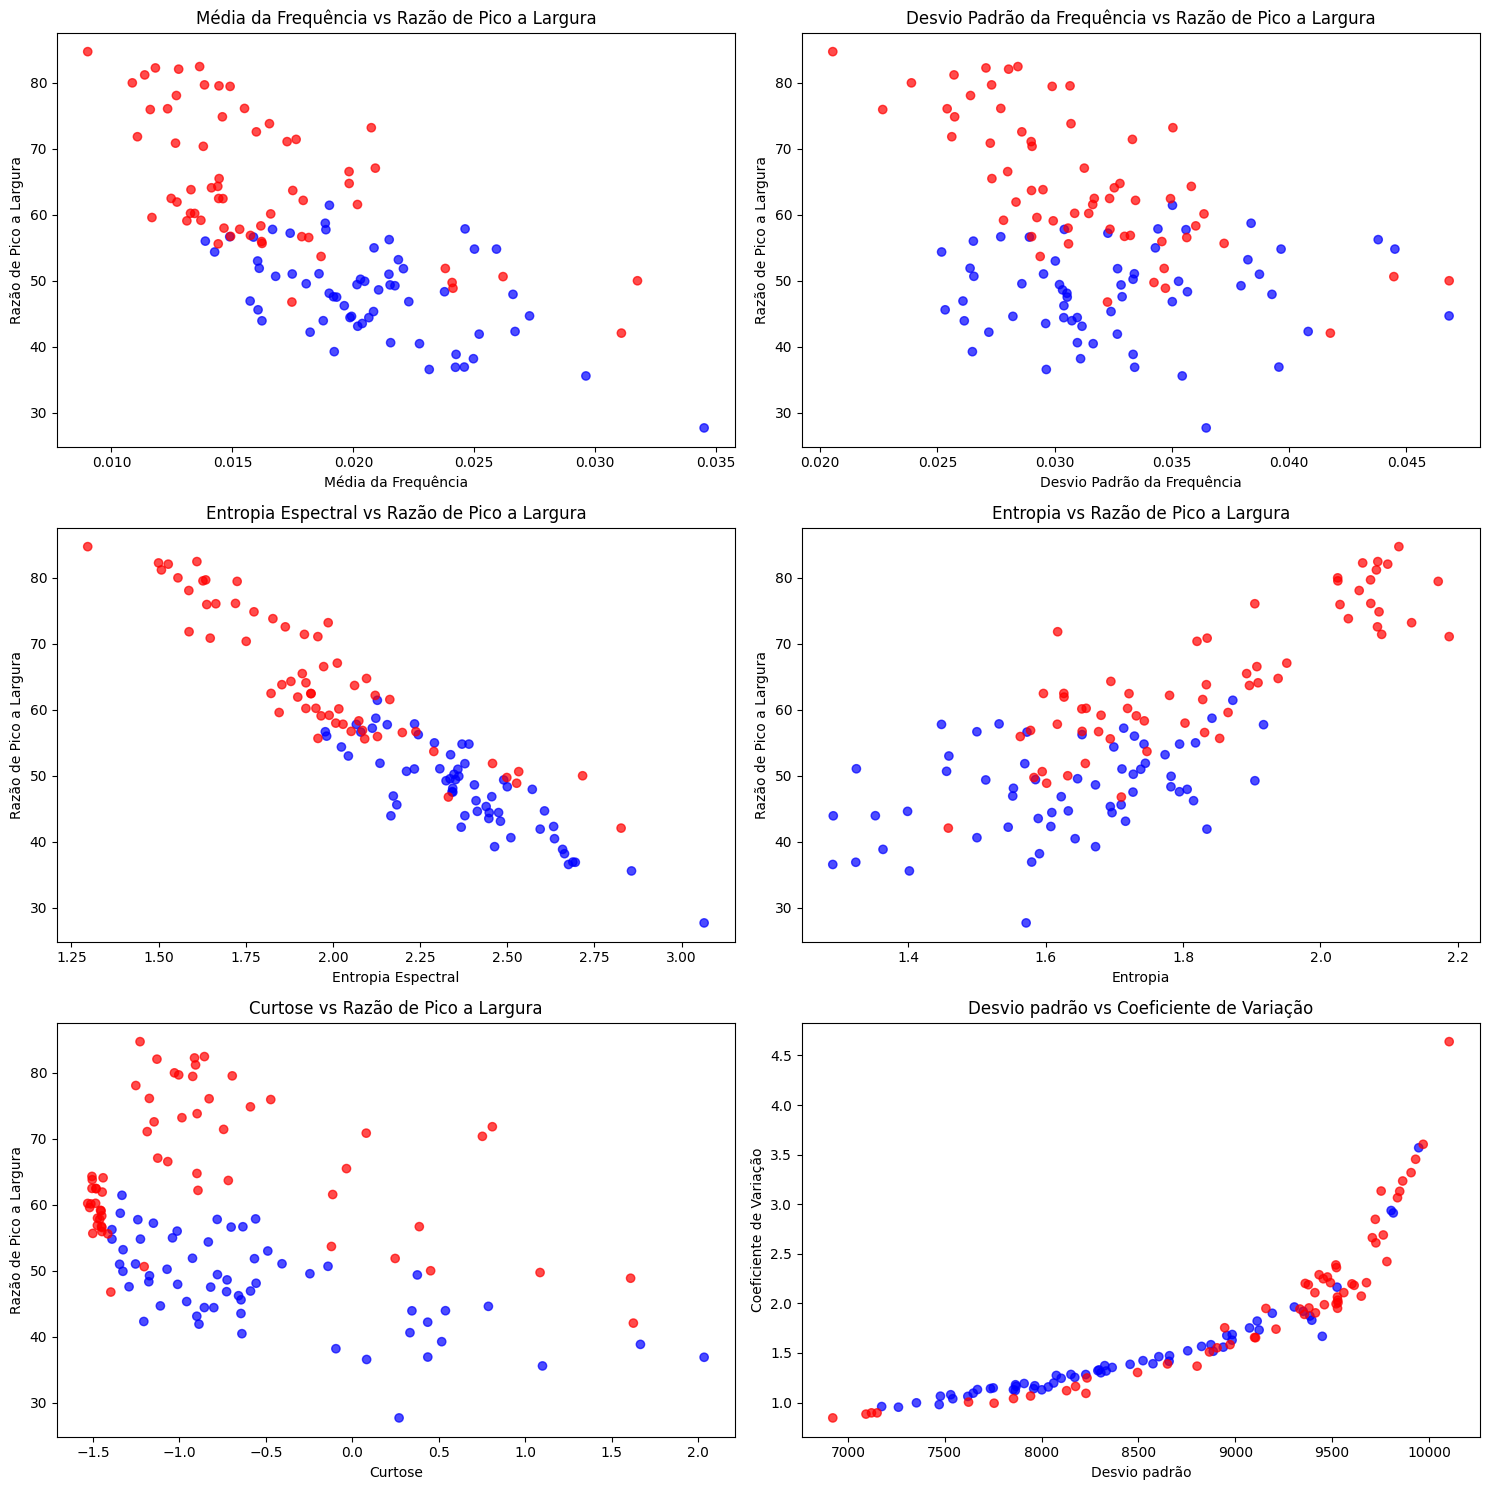

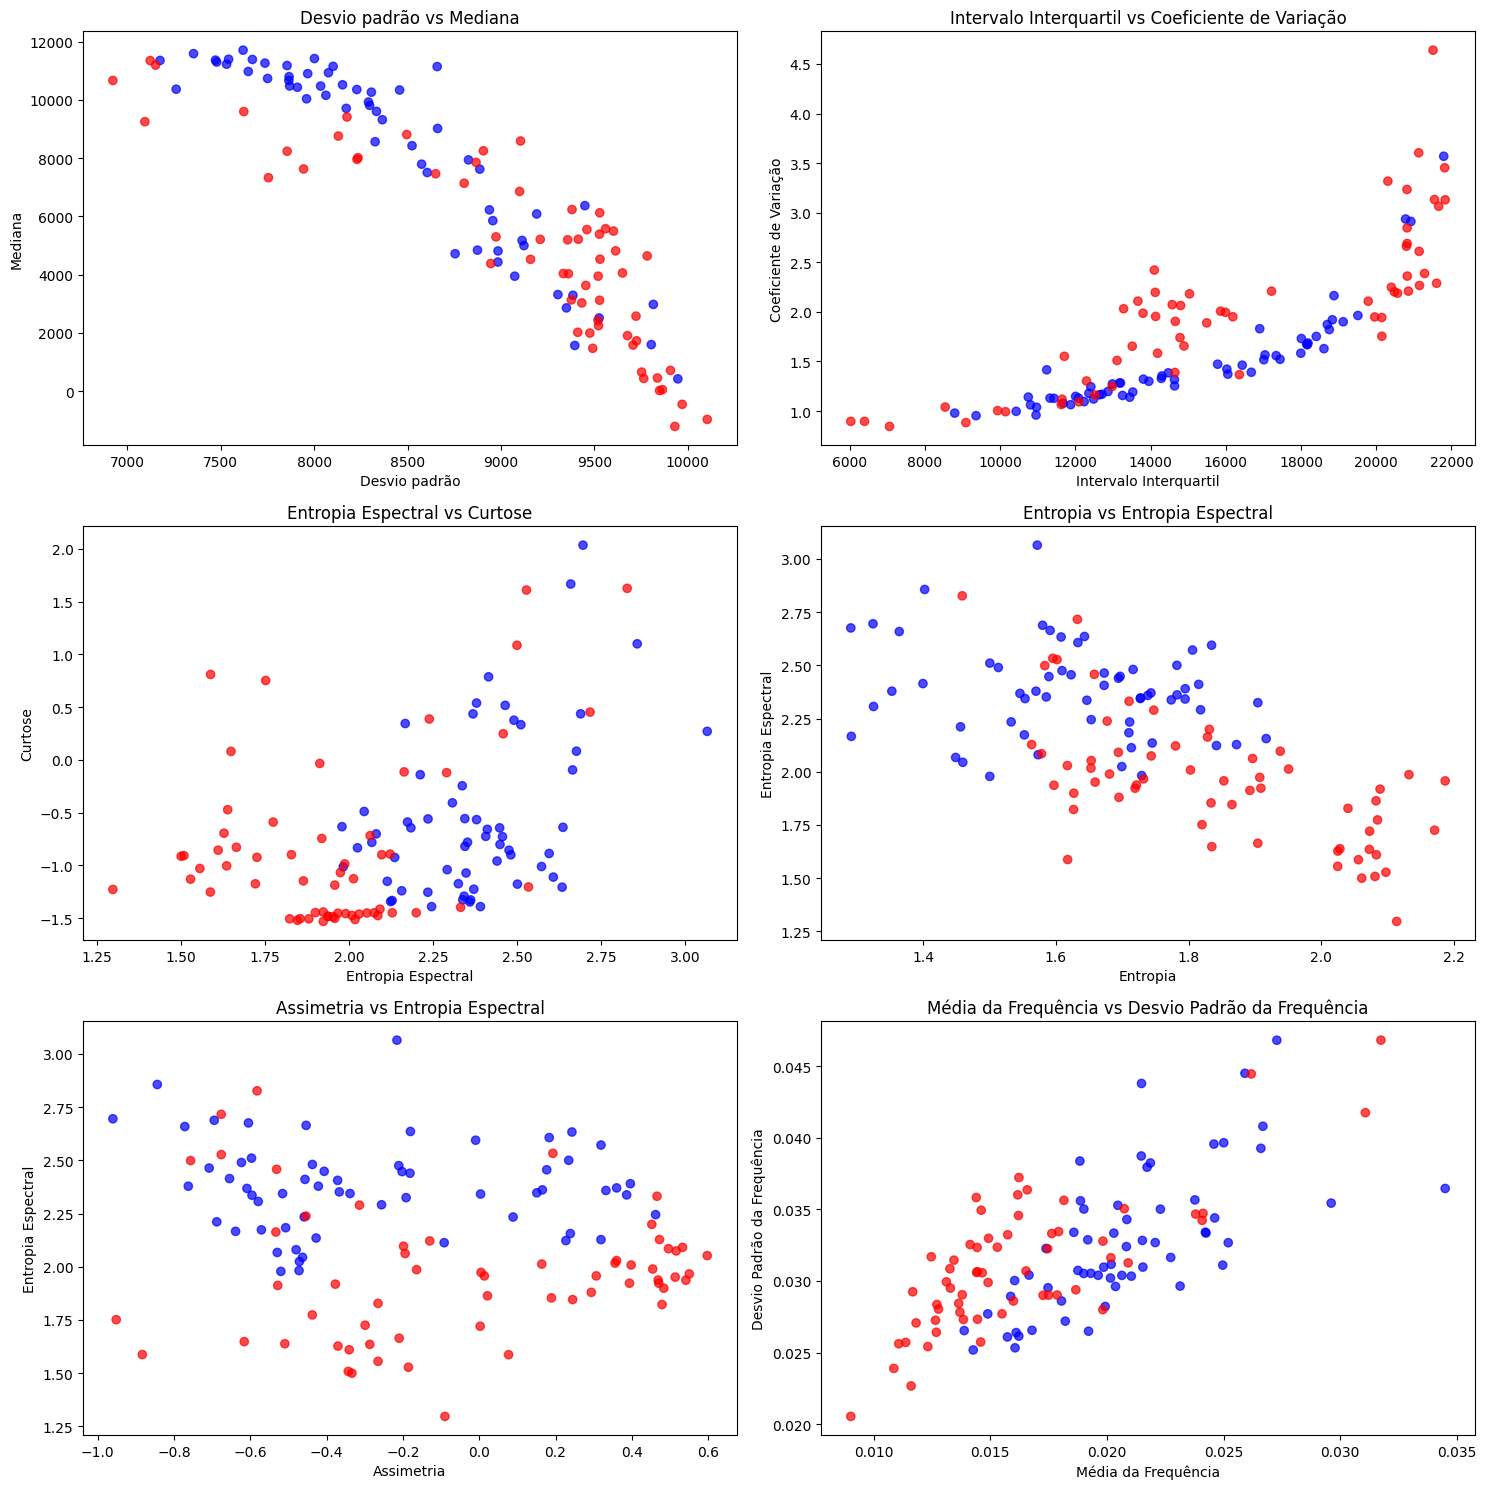

In [697]:
plot_all_scatter(all_features, df_output_data.values.flatten(), feature_names, combinations)

### Justificativas:
> Ao analisar os gráficos de dispersão, os atributos 'Desvio Padrão' e 'Coeficiente de Variação' mostraram extrair características muito semelhantes. E também, em geral, o 'Desvio Padrão' não apresentou uma boa separação de classes em par com outros atributos. Desse modo, removi ambos.

> O atributo 'Razão de Pico a Largura' fez uma boa separação de classe em par com os demais atributos.